In [71]:
import pandas as pd
import numpy as np
import os
import pickle
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from itertools import chain
import cv2 as cv
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical, pad_sequences, plot_model, to_categorical
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, BatchNormalization, Embedding, Flatten, Conv2D, MaxPooling2D

0 종이류
1 플라스틱류
2 유리병
3 캔류
4 고철류
5 스티로폼
6 도기류
7 비닐류
8 형광등
9 페트병
10 나무

In [2]:
# 이미지 (150, 150)로 리사이징 
def scaling(data_list):
    X = np.zeros((len(data_list),150,150,3))
    for idx, file in enumerate(data_list):
        dt = plt.imread(file)
        dt = cv.resize(dt, (150,150)).reshape(1,150,150,-1)
        X[idx] = dt[:,:,:,:3]
    return X

In [32]:
# image 파라미터에 이미지경로를 넣거나 imread를 통해 읽어내면 레이블의 한글명, 이미지를 반환
def what(image):
    if isinstance(image, np.ndarray):
        img=image.astype(int)
        dt=cv.resize(img,(150,150)).reshape(1,150,150,-1)
        dt=dt[:,:,:,:3]
        dt_trans = vgg.predict(dt)
        argmax = np.argmax(model.predict(dt_trans))
        return label_by_index(argmax), plt.imshow(img)
    else:
        img=plt.imread(image)
        dt=cv.resize(img,(150,150)).reshape(1,150,150,-1)
        dt=dt[:,:,:,:3]
        dt_trans = vgg.predict(dt)
        argmax = np.argmax(model.predict(dt_trans))
        print(model.predict(dt_trans))
        return label_by_index(argmax), plt.imshow(img)

## VGG16 모델 - 11개의 카테고리
500개씩 총 5500개 데이터

In [17]:
# 각각의 리스트에 이미지파일명 담기
paper_list=glob("./_trash/*종이류*/*/*/*.jpg")
plastic_list=glob("./_trash/*플라스틱류*/*/*/*.jpg")
glass_list=glob("./_trash/*유리병*/*/*/*.jpg")
can_list=glob("./_trash/*캔류*/*/*/*.jpg")
metal_list=glob("./_trash/*고철류*/*/*/*.jpg")
styrofoam_list=glob("./_trash/*스티로폼*/*/*/*.jpg")
pottery_list=glob("./_trash/*도기류*/*/*/*.jpg")
vinyl_list=glob("./_trash/*비닐류*/*/*/*.jpg")
lamp_list=glob("./_trash/*형광등*/*/*/*.jpg")
pet_list=glob("./_trash/*페트병*/*/*/*.jpg")
tree_list=glob("./_trash/*나무*/*/*/*.jpg")

# 각 리스트의 개수
print(len(paper_list))
print(len(plastic_list))
print(len(glass_list))
print(len(can_list))
print(len(metal_list))
print(len(styrofoam_list))
print(len(pottery_list))
print(len(vinyl_list))
print(len(lamp_list))
print(len(pet_list))
print(len(tree_list))

40331
40422
42187
36874
40100
40377
40262
41220
40270
40036
41697


In [18]:
data_list=list(chain(
    paper_list,
    plastic_list,
    glass_list,
    can_list,
    metal_list,
    styrofoam_list,
    pottery_list,
    vinyl_list,
    lamp_list,
    pet_list,
    tree_list
))
print(len(data_list))

443776


In [71]:
# 데이터셋 개수 설정함수
def make_dl(n):
    paper_list_n=paper_list[:n]
    plastic_list_n=plastic_list[:n]
    glass_list_n=glass_list[:n]
    can_list_n=can_list[:n]
    metal_list_n=metal_list[:n]
    styrofoam_list_n=styrofoam_list[:n]
    pottery_list_n=pottery_list[:n]
    vinyl_list_n=vinyl_list[:n]
    lamp_list_n=lamp_list[:n]
    pet_list_n=pet_list[:n]
    tree_list_n=tree_list[:n]
    data_list_n=list(chain(
        paper_list_n, 
        plastic_list_n, 
        glass_list_n, 
        can_list_n, 
        metal_list_n, 
        styrofoam_list_n, 
        pottery_list_n, 
        vinyl_list_n, 
        lamp_list_n,
        pet_list_n,
        tree_list_n
    ))
    return data_list_n

In [72]:
# target리스트 생성함수
def make_target(data_list):
    target=[]
    for idx, val in enumerate(data_list):
        if '종이류' in val:
            target.append(0)
        elif '플라스틱' in val:
            target.append(1)
        elif '유리병' in val:
            target.append(2)
        elif '캔류' in val:
            target.append(3)
        elif '고철류' in val:
            target.append(4)
        elif '스티로폼' in val:
            target.append(5)
        elif '도기류' in val:
            target.append(6)
        elif '비닐류' in val:
            target.append(7)
        elif '형광등' in val:
            target.append(8)
        elif '페트병' in val:
            target.append(9)
        elif '나무' in val:
            target.append(10)
    return target

In [73]:
# 레이블
def label_by_index(index):
    labels = ["종이류", "플라스틱류", "유리병", "캔류", "고철류", "스티로폼", "도기류", "비닐류", "형광등", "페트병", "나무"]
    return labels[index]

In [74]:
n=500

# 각 분류당 n개 추출해서 data_list로 병합
data_list=make_dl(n)

# target 생성
target=make_target(data_list)

# 총 데이터셋 개수
print(len(data_list))

5500


In [75]:
# 정수형클래스 레이블을 원-핫 인코딩 벡터로 변환하는 함수
y = np.array(target)
y = to_categorical(y)

In [76]:
X=scaling(data_list)

In [77]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2)

In [78]:
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_)

In [181]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(1100, 150, 150, 3)
(1100, 11)
(3300, 150, 150, 3)
(3300, 11)
(1100, 150, 150, 3)
(1100, 11)


In [182]:
vgg = VGG16(include_top=False, input_shape=(150,150,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [183]:
X_train_trans = vgg.predict(X_train)
X_validation_trans = vgg.predict(X_validation)

35/35 [==============================] - 23s 661ms/step


In [184]:
model = Sequential(
    [
        Flatten(input_shape=X_train_trans.shape[1:]),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(128,activation='relu'),
        BatchNormalization(),
        Dense(64,activation='relu'),
        BatchNormalization(),
        Dense(32,activation='relu'),
        BatchNormalization(),
        Dense(11
              ,activation='softmax')
    ]
)

In [185]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [186]:
history=model.fit(
    X_train_trans,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_validation_trans, y_validation)
)

Epoch 1/20
104/104 [==============================] - 4s 21ms/step - loss: 1.5337 - accuracy: 0.5142 - val_loss: 1.2370 - val_accuracy: 0.6436
Epoch 2/20
104/104 [==============================] - 2s 19ms/step - loss: 0.7309 - accuracy: 0.7955 - val_loss: 0.9373 - val_accuracy: 0.7100
Epoch 3/20
104/104 [==============================] - 2s 19ms/step - loss: 0.3849 - accuracy: 0.9024 - val_loss: 0.8492 - val_accuracy: 0.7436
Epoch 4/20
104/104 [==============================] - 2s 19ms/step - loss: 0.2556 - accuracy: 0.9355 - val_loss: 0.8163 - val_accuracy: 0.7545
Epoch 5/20
104/104 [==============================] - 2s 19ms/step - loss: 0.1484 - accuracy: 0.9703 - val_loss: 0.8104 - val_accuracy: 0.7609
Epoch 6/20
104/104 [==============================] - 2s 19ms/step - loss: 0.1384 - accuracy: 0.9691 - val_loss: 0.8842 - val_accuracy: 0.7373
Epoch 7/20
104/104 [==============================] - 2s 19ms/step - loss: 0.1006 - accuracy: 0.9779 - val_loss: 0.9168 - val_accuracy: 0.7609

In [187]:
X_test_trans=vgg.predict(X_test)

35/35 [==============================] - 22s 615ms/step


In [188]:
model.evaluate(X_test_trans, y_test)

35/35 [==============================] - 0s 2ms/step - loss: 1.1605 - accuracy: 0.7473


[1.160548210144043, 0.7472727298736572]

In [189]:
print(np.mean(history.history['loss']))
print(np.mean(history.history['accuracy']))
print(np.mean(history.history['val_loss']))
print(np.mean(history.history['val_accuracy']))

0.20973119931295514
0.940696981549263
0.9955230325460434
0.735954549908638


## VGG16 block을 나눠서 학습한 모델(block1-3, block4-5) - 11개의 카테고리
500개씩 총 5500개 데이터

In [3]:
# 각각의 리스트에 이미지파일명 담기
paper_list=glob("./_trash/*종이류*/*/*/*.jpg")
plastic_list=glob("./_trash/*플라스틱류*/*/*/*.jpg")
glass_list=glob("./_trash/*유리병*/*/*/*.jpg")
can_list=glob("./_trash/*캔류*/*/*/*.jpg")
metal_list=glob("./_trash/*고철류*/*/*/*.jpg")
styrofoam_list=glob("./_trash/*스티로폼*/*/*/*.jpg")
pottery_list=glob("./_trash/*도기류*/*/*/*.jpg")
vinyl_list=glob("./_trash/*비닐류*/*/*/*.jpg")
lamp_list=glob("./_trash/*형광등*/*/*/*.jpg")
pet_list=glob("./_trash/*페트병*/*/*/*.jpg")
tree_list=glob("./_trash/*나무*/*/*/*.jpg")

# 각 리스트의 개수
print(len(paper_list))
print(len(plastic_list))
print(len(glass_list))
print(len(can_list))
print(len(metal_list))
print(len(styrofoam_list))
print(len(pottery_list))
print(len(vinyl_list))
print(len(lamp_list))
print(len(pet_list))
print(len(tree_list))

40391
40422
42187
40085
40100
40377
40262
41220
40270
40036
41697


In [6]:
data_list=list(chain(
    paper_list,
    plastic_list,
    glass_list,
    can_list,
    metal_list,
    styrofoam_list,
    pottery_list,
    vinyl_list,
    lamp_list,
    pet_list,
    tree_list
))
print(len(data_list))

447047


In [7]:
# 데이터셋 개수 설정함수
def make_dl(n):
    paper_list_n=paper_list[:n]
    plastic_list_n=plastic_list[:n]
    glass_list_n=glass_list[:n]
    can_list_n=can_list[:n]
    metal_list_n=metal_list[:n]
    styrofoam_list_n=styrofoam_list[:n]
    pottery_list_n=pottery_list[:n]
    vinyl_list_n=vinyl_list[:n]
    lamp_list_n=lamp_list[:n]
    pet_list_n=pet_list[:n]
    tree_list_n=tree_list[:n]
    data_list_n=list(chain(
        paper_list_n, 
        plastic_list_n, 
        glass_list_n, 
        can_list_n, 
        metal_list_n, 
        styrofoam_list_n, 
        pottery_list_n, 
        vinyl_list_n, 
        lamp_list_n,
        pet_list_n,
        tree_list_n
    ))
    return data_list_n

In [8]:
# target리스트 생성함수
def make_target(data_list):
    target=[]
    for idx, val in enumerate(data_list):
        if '종이류' in val:
            target.append(0)
        elif '플라스틱' in val:
            target.append(1)
        elif '유리병' in val:
            target.append(2)
        elif '캔류' in val:
            target.append(3)
        elif '고철류' in val:
            target.append(4)
        elif '스티로폼' in val:
            target.append(5)
        elif '도기류' in val:
            target.append(6)
        elif '비닐류' in val:
            target.append(7)
        elif '형광등' in val:
            target.append(8)
        elif '페트병' in val:
            target.append(9)
        elif '나무' in val:
            target.append(10)
    return target

In [10]:
# 레이블
def label_by_index(index):
    labels = ["종이류", "플라스틱류", "유리병", "캔류", "고철류", "스티로폼", "도기류", "비닐류", "형광등", "페트병", "나무"]
    return labels[index]

In [12]:
# n=500
# 각 분류당 n개 추출해서 data_list로 병합
data_list=make_dl(500)

# target 생성
target=make_target(data_list)

# 총 데이터셋 개수
print(len(data_list))

5500


In [13]:
# 정수형클래스 레이블을 원-핫 인코딩 벡터로 변환하는 함수
y = np.array(target)
y = to_categorical(y)

In [14]:
# data_list를 이용해 스케일링
X=scaling(data_list)

In [87]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2)

In [88]:
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_)

In [89]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(1100, 150, 150, 3)
(1100, 11)
(3300, 150, 150, 3)
(3300, 11)
(1100, 150, 150, 3)
(1100, 11)


In [90]:
vgg = VGG16(include_top=False, input_shape=(150,150,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [91]:
output_layers=[]
for layer in vgg.layers[:len(vgg.layers)-8]:
    output_layers.append(vgg.get_layer(layer.name))
print(output_layers)

[<keras.src.engine.input_layer.InputLayer object at 0x000002CC1039A490>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002CC0F7C9590>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002CC0F21E4D0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002CC0F8F6AD0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002CC0F989BD0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002CC103B17D0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002CC1039BE10>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002CC103C19D0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002CC103A7DD0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002CC0FA5EBD0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002CC10119810>]


In [92]:
model=Sequential()
for layer in output_layers:
    model.add(layer)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)      

In [93]:
X_train_trans = model.predict(X_train)
X_validation_trans = model.predict(X_validation)

35/35 [==============================] - 15s 438ms/step


In [94]:
print(X_train_trans.shape)
print(X_validation_trans.shape)

(3300, 18, 18, 256)
(1100, 18, 18, 256)


In [172]:
model_=Sequential()
model_.add(Conv2D(input_shape=X_train_trans.shape[1:], padding='same', filters=512, kernel_size=(3,3)))
model_.add(Conv2D(padding='same', filters=512, kernel_size=(3,3)))
model_.add(Conv2D(padding='same', filters=512, kernel_size=(3,3)))
model_.add(MaxPooling2D())
model_.add(Conv2D(padding='same', filters=512, kernel_size=(3,3)))
model_.add(Conv2D(padding='same', filters=512, kernel_size=(3,3)))
model_.add(Conv2D(padding='same', filters=512, kernel_size=(3,3)))
model_.add(MaxPooling2D())
model_.add(Flatten())
model_.add(Dense(256,activation='relu'))
model_.add(BatchNormalization())
model_.add(Dense(128,activation='relu'))
model_.add(BatchNormalization())
model_.add(Dense(64,activation='relu'))
model_.add(BatchNormalization())
model_.add(Dense(32,activation='relu'))
model_.add(BatchNormalization())
model_.add(Dense(11, activation='softmax'))
model_.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 18, 18, 512)       1180160   
                                                                 
 conv2d_7 (Conv2D)           (None, 18, 18, 512)       2359808   
                                                                 
 conv2d_8 (Conv2D)           (None, 18, 18, 512)       2359808   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 512)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 512)         2359808   
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 512)         2359808   
                                                      

In [173]:
model_.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [164]:
history = model_.fit(
    X_train_trans,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_validation_trans, y_validation)
)

Epoch 1/20
104/104 [==============================] - 106s 1s/step - loss: 1.2378 - accuracy: 0.5788 - val_loss: 1.8150 - val_accuracy: 0.4736
Epoch 2/20
104/104 [==============================] - 107s 1s/step - loss: 1.0776 - accuracy: 0.6403 - val_loss: 1.5716 - val_accuracy: 0.5064
Epoch 3/20
104/104 [==============================] - 106s 1s/step - loss: 1.0613 - accuracy: 0.6339 - val_loss: 2.5944 - val_accuracy: 0.3764
Epoch 4/20
104/104 [==============================] - 101s 972ms/step - loss: 0.9860 - accuracy: 0.6645 - val_loss: 1.5688 - val_accuracy: 0.5227
Epoch 5/20
104/104 [==============================] - 102s 980ms/step - loss: 0.9761 - accuracy: 0.6694 - val_loss: 1.4783 - val_accuracy: 0.5582
Epoch 6/20
104/104 [==============================] - 102s 977ms/step - loss: 0.9387 - accuracy: 0.6888 - val_loss: 1.6120 - val_accuracy: 0.5155
Epoch 7/20
104/104 [==============================] - 101s 970ms/step - loss: 0.9082 - accuracy: 0.6930 - val_loss: 3.4849 - val_accu

In [168]:
X_test_trans=vgg.predict(X_test)

35/35 [==============================] - 22s 614ms/step


In [174]:
model.evaluate(X_test_trans, y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [180]:
print(np.mean(history.history['loss']))
print(np.mean(history.history['accuracy']))
print(np.mean(history.history['val_loss']))
print(np.mean(history.history['val_accuracy']))

0.7927823394536972
0.7321515142917633
1.7083608210086823
0.5422272697091103


## VGG16 모델 - 4개의 카테고리(종이, 플라스틱, 유리병, 페트병)
10000개씩 총 40000개 데이터(이미지 리사이징)

In [200]:
# 각각의 리스트에 이미지파일명 담기
paper_list=glob("./_trash/*종이류*/*/*/*.jpg")
plastic_list=glob("./_trash/*플라스틱류*/*/*/*.jpg")
glass_list=glob("./_trash/*유리병*/*/*/*.jpg")
pet_list=glob("./_trash/*페트병*/*/*/*.jpg")

# 각 리스트의 개수
print(len(paper_list))
print(len(plastic_list))
print(len(glass_list))
print(len(pet_list))

40391
40422
42187
40036


In [201]:
data_list=list(chain(
    paper_list,
    plastic_list,
    glass_list,
    pet_list
))
print(len(data_list))

163036


In [211]:
# 데이터셋 개수 설정함수
def make_dl(n):
    paper_list_n=paper_list[:n]
    plastic_list_n=plastic_list[:n]
    glass_list_n=glass_list[:n]
    pet_list_n=pet_list[:n]
    data_list_n=list(chain(
        paper_list_n, 
        plastic_list_n,
        glass_list_n,
        pet_list_n
    ))
    return data_list_n

In [212]:
# target리스트 생성함수
def make_target(data_list):
    target=[]
    for idx, val in enumerate(data_list):
        if '종이류' in val:
            target.append(0)
        elif '플라스틱류' in val:
            target.append(1)
        elif '유리병' in val:
            target.append(2)
        elif '페트병' in val:
            target.append(3)
    return target

In [213]:
# 레이블
def label_by_index(index):
    labels = ["종이류", "플라스틱류", "유리병", "페트병"]
    return labels[index]

In [215]:
n=10000

# 각 분류당 n개 추출해서 data_list로 병합
data_list=make_dl(n)

# target 생성
target=make_target(data_list)

# 총 데이터셋 개수
print(len(data_list))
print(len(target))

40000
40000


In [216]:
# 정수형클래스 레이블을 원-핫 인코딩 벡터로 변환하는 함수
y = np.array(target)
y = to_categorical(y)
print(y.shape)

(40000, 4)


In [217]:
X=scaling(data_list)

In [218]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2)

In [219]:
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_)

In [220]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(8000, 150, 150, 3)
(8000, 4)
(24000, 150, 150, 3)
(24000, 4)
(8000, 150, 150, 3)
(8000, 4)


In [221]:
vgg = VGG16(include_top=False, input_shape=(150,150,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [222]:
X_train_trans = vgg.predict(X_train)
X_validation_trans = vgg.predict(X_validation)

250/250 [==============================] - 166s 664ms/step


In [223]:
model = Sequential(
    [
        Flatten(input_shape=X_train_trans.shape[1:]),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(128,activation='relu'),
        BatchNormalization(),
        Dense(64,activation='relu'),
        BatchNormalization(),
        Dense(32,activation='relu'),
        BatchNormalization(),
        Dense(4
              ,activation='softmax')
    ]
)

In [224]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [225]:
history=model.fit(
    X_train_trans,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_validation_trans, y_validation)
)

Epoch 1/20
750/750 [==============================] - 16s 19ms/step - loss: 0.5868 - accuracy: 0.7824 - val_loss: 0.4591 - val_accuracy: 0.8299
Epoch 2/20
750/750 [==============================] - 14s 18ms/step - loss: 0.3928 - accuracy: 0.8548 - val_loss: 0.4505 - val_accuracy: 0.8404
Epoch 3/20
750/750 [==============================] - 14s 18ms/step - loss: 0.3058 - accuracy: 0.8908 - val_loss: 0.4646 - val_accuracy: 0.8379
Epoch 4/20
750/750 [==============================] - 14s 18ms/step - loss: 0.2432 - accuracy: 0.9137 - val_loss: 0.4902 - val_accuracy: 0.8397
Epoch 5/20
750/750 [==============================] - 14s 18ms/step - loss: 0.1916 - accuracy: 0.9313 - val_loss: 0.5679 - val_accuracy: 0.8226
Epoch 6/20
750/750 [==============================] - 14s 18ms/step - loss: 0.1615 - accuracy: 0.9406 - val_loss: 0.5330 - val_accuracy: 0.8456
Epoch 7/20
750/750 [==============================] - 14s 18ms/step - loss: 0.1354 - accuracy: 0.9507 - val_loss: 0.5653 - val_accuracy:

In [226]:
X_test_trans=vgg.predict(X_test)

250/250 [==============================] - 166s 665ms/step


In [227]:
model.evaluate(X_test_trans, y_test)

250/250 [==============================] - 1s 2ms/step - loss: 0.9262 - accuracy: 0.8459


[0.9262303113937378, 0.8458750247955322]

In [228]:
print(np.mean(history.history['loss']))
print(np.mean(history.history['accuracy']))
print(np.mean(history.history['val_loss']))
print(np.mean(history.history['val_accuracy']))

0.14227564428001643
0.948816666007042
0.6461240068078041
0.840318751335144


## VGG16 모델 - 4개의 카테고리(종이, 유리병, 캔, 페트병)
10000개씩 총 40000개 데이터(이미지 리사이징)

In [23]:
# 각각의 리스트에 이미지파일명 담기
paper_list=glob("./_trash/*종이류*/*/*/*.jpg")
glass_list=glob("./_trash/*유리병*/*/*/*.jpg")
can_list=glob("./_trash/*캔류*/*/*/*.jpg")
pet_list=glob("./_trash/*페트병*/*/*/*.jpg")

# 각 리스트의 개수
print(len(paper_list))
print(len(glass_list))
print(len(can_list))
print(len(pet_list))

16468
42187
36874
40036


In [24]:
data_list=list(chain(
    paper_list,
    glass_list,
    can_list,
    pet_list
))
print(len(data_list))

135565


In [25]:
# 데이터셋 개수 설정함수
def make_dl(n):
    paper_list_n=paper_list[:n]
    glass_list_n=glass_list[:n]
    can_list_n=can_list[:n]
    pet_list_n=pet_list[:n]
    data_list_n=list(chain(
        paper_list_n, 
        glass_list_n,
        can_list_n,
        pet_list_n
    ))
    return data_list_n

In [26]:
# target리스트 생성함수
def make_target(data_list):
    target=[]
    for idx, val in enumerate(data_list):
        if '종이류' in val:
            target.append(0)
        elif '유리병' in val:
            target.append(1)
        elif '캔류' in val:
            target.append(2)
        elif '페트병' in val:
            target.append(3)
    return target

In [27]:
# 레이블
def label_by_index(index):
    labels = ["종이류", "유리병", "캔류", "페트병"]
    return labels[index]

In [28]:
n=5000

# 각 분류당 n개 추출해서 data_list로 병합
data_list=make_dl(n)

# target 생성
target=make_target(data_list)

# 총 데이터셋 개수
print(len(data_list))
print(len(target))

20000
20000


In [29]:
# 정수형클래스 레이블을 원-핫 인코딩 벡터로 변환하는 함수
y = np.array(target)
y = to_categorical(y)

(20000, 4)


In [30]:
X=scaling(data_list)

In [31]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2)

In [32]:
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_)

In [221]:
vgg = VGG16(include_top=False, input_shape=(150,150,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [35]:
X_train_trans = vgg.predict(X_train)
X_validation_trans = vgg.predict(X_validation)

125/125 [==============================] - 87s 697ms/step


In [254]:
model = Sequential(
    [
        Flatten(input_shape=X_train_trans.shape[1:]),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(128,activation='relu'),
        BatchNormalization(),
        Dense(64,activation='relu'),
        BatchNormalization(),
        Dense(32,activation='relu'),
        BatchNormalization(),
        Dense(4
              ,activation='softmax')
    ]
)

In [343]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_50 (Dense)            (None, 256)               2097408   
                                                                 
 batch_normalization_40 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_51 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_41 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_52 (Dense)            (None, 64)              

In [255]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [256]:
history=model.fit(
    X_train_trans,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_validation_trans, y_validation)
)

Epoch 1/20
750/750 [==============================] - 16s 19ms/step - loss: 0.5528 - accuracy: 0.7891 - val_loss: 0.4077 - val_accuracy: 0.8459
Epoch 2/20
750/750 [==============================] - 14s 18ms/step - loss: 0.3601 - accuracy: 0.8665 - val_loss: 0.3738 - val_accuracy: 0.8614
Epoch 3/20
750/750 [==============================] - 14s 18ms/step - loss: 0.2723 - accuracy: 0.8991 - val_loss: 0.4042 - val_accuracy: 0.8586
Epoch 4/20
750/750 [==============================] - 14s 18ms/step - loss: 0.2209 - accuracy: 0.9186 - val_loss: 0.4167 - val_accuracy: 0.8583
Epoch 5/20
750/750 [==============================] - 14s 18ms/step - loss: 0.1671 - accuracy: 0.9402 - val_loss: 0.4541 - val_accuracy: 0.8597
Epoch 6/20
750/750 [==============================] - 14s 18ms/step - loss: 0.1383 - accuracy: 0.9495 - val_loss: 0.4467 - val_accuracy: 0.8640
Epoch 7/20
750/750 [==============================] - 14s 18ms/step - loss: 0.1099 - accuracy: 0.9602 - val_loss: 0.4809 - val_accuracy:

In [257]:
X_test_trans=vgg.predict(X_test)

250/250 [==============================] - 166s 663ms/step


In [258]:
model.evaluate(X_test_trans, y_test)

250/250 [==============================] - 1s 2ms/step - loss: 0.6383 - accuracy: 0.8643


[0.6383033394813538, 0.8642500042915344]

In [259]:
print(np.mean(history.history['loss']))
print(np.mean(history.history['accuracy']))
print(np.mean(history.history['val_loss']))
print(np.mean(history.history['val_accuracy']))

0.1279469307512045
0.9532208353281021
0.5314050883054733
0.863131245970726


## VGG16 모델 - 5개의 카테고리(종이, 유리병, 캔, 스티로폼, 페트병)
10000개씩 총 50000개 데이터(이미지 리사이징)

In [ ]:
# 각각의 리스트에 이미지파일명 담기
paper_list=glob("./_trash/*종이류*/*/*/*.jpg")
glass_list=glob("./_trash/*유리병*/*/*/*.jpg")
can_list=glob("./_trash/*캔류*/*/*/*.jpg")
styrofoam_list=glob("./_trash/*스티로폼*/*/*/*.jpg")
pet_list=glob("./_trash/*페트병*/*/*/*.jpg")

# 각 리스트의 개수
print(len(paper_list))
print(len(glass_list))
print(len(can_list))
print(len(styrofoam_list))
print(len(pet_list))

In [ ]:
data_list=list(chain(
    paper_list,
    glass_list,
    can_list,
    styrofoam_list,
    pet_list
))
print(len(data_list))

In [ ]:
# 데이터셋 개수 설정함수
def make_dl(n):
    paper_list_n=paper_list[:n]
    glass_list_n=glass_list[:n]
    can_list_n=can_list[:n]
    styrofoam_list_n=styrofoam_list[:n]
    pet_list_n=pet_list[:n]
    data_list_n=list(chain(
        paper_list_n, 
        glass_list_n,
        can_list_n,
        styrofoam_list_n,
        pet_list_n
    ))
    return data_list_n

In [ ]:
# target리스트 생성함수
def make_target(data_list):
    target=[]
    for idx, val in enumerate(data_list):
        if '종이류' in val:
            target.append(0)
        elif '유리병' in val:
            target.append(1)
        elif '캔류' in val:
            target.append(2)
        elif '스티로폼' in val:
            target.append(3)
        elif '페트병' in val:
            target.append(4)
    return target

In [ ]:
# 레이블
def label_by_index(index):
    labels = ["종이류", "유리병", "캔류", "스티로폼", "페트병"]
    return labels[index]

In [ ]:
n=10000

# 각 분류당 n개 추출해서 data_list로 병합
data_list=make_dl(n)

# target 생성
target=make_target(data_list)

# 총 데이터셋 개수
print(len(data_list))
print(len(target))

In [279]:
# 정수형클래스 레이블을 원-핫 인코딩 벡터로 변환하는 함수
y = np.array(target)
y = to_categorical(y)
print(y.shape)

(50000, 5)


In [280]:
X=scaling(data_list)

In [284]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2)

In [285]:
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_)

In [286]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(10000, 150, 150, 3)
(10000, 5)
(30000, 150, 150, 3)
(30000, 5)
(10000, 150, 150, 3)
(10000, 5)


In [287]:
vgg = VGG16(include_top=False, input_shape=(150,150,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [288]:
X_train_trans = vgg.predict(X_train)
X_validation_trans = vgg.predict(X_validation)

313/313 [==============================] - 210s 670ms/step


In [289]:
model = Sequential(
    [
        Flatten(input_shape=X_train_trans.shape[1:]),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(128,activation='relu'),
        BatchNormalization(),
        Dense(64,activation='relu'),
        BatchNormalization(),
        Dense(32,activation='relu'),
        BatchNormalization(),
        Dense(5
              ,activation='softmax')
    ]
)

In [290]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [291]:
history=model.fit(
    X_train_trans,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_validation_trans, y_validation)
)

Epoch 1/20
938/938 [==============================] - 19s 19ms/step - loss: 0.5061 - accuracy: 0.8124 - val_loss: 0.3470 - val_accuracy: 0.8714
Epoch 2/20
938/938 [==============================] - 17s 18ms/step - loss: 0.3263 - accuracy: 0.8820 - val_loss: 0.3540 - val_accuracy: 0.8706
Epoch 3/20
938/938 [==============================] - 17s 18ms/step - loss: 0.2375 - accuracy: 0.9139 - val_loss: 0.3340 - val_accuracy: 0.8824
Epoch 4/20
938/938 [==============================] - 17s 18ms/step - loss: 0.1839 - accuracy: 0.9331 - val_loss: 0.3368 - val_accuracy: 0.8882
Epoch 5/20
938/938 [==============================] - 17s 18ms/step - loss: 0.1494 - accuracy: 0.9471 - val_loss: 0.3538 - val_accuracy: 0.8872
Epoch 6/20
938/938 [==============================] - 17s 18ms/step - loss: 0.1202 - accuracy: 0.9564 - val_loss: 0.3774 - val_accuracy: 0.8881
Epoch 7/20
938/938 [==============================] - 17s 18ms/step - loss: 0.1011 - accuracy: 0.9641 - val_loss: 0.4400 - val_accuracy:

In [292]:
X_test_trans=vgg.predict(X_test)

313/313 [==============================] - 209s 668ms/step


In [293]:
model.evaluate(X_test_trans, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5847 - accuracy: 0.8817


[0.5846993923187256, 0.8816999793052673]

In [294]:
print(np.mean(history.history['loss']))
print(np.mean(history.history['accuracy']))
print(np.mean(history.history['val_loss']))
print(np.mean(history.history['val_accuracy']))

0.11166289420798421
0.9600333333015442
0.4469304412603378
0.884264999628067


## VGG16 모델 - 6개의 카테고리(종이, 플라스틱, 유리병, 캔, 스티로폼, 페트병) 무게 특성 추가
10000개씩 총 60000개 데이터(이미지 리사이징)

In [412]:
# 각각의 리스트에 이미지파일명 담기
paper_list=glob("./_trash/*종이류*/*/*/*.jpg")
plastic_list=glob("./_trash/*플라스틱류*/*/*/*.jpg")
glass_list=glob("./_trash/*유리병*/*/*/*.jpg")
can_list=glob("./_trash/*캔류*/*/*/*.jpg")
styrofoam_list=glob("./_trash/*스티로폼*/*/*/*.jpg")
pet_list=glob("./_trash/*페트병*/*/*/*.jpg")

# 각 리스트의 개수
print(len(paper_list))
print(len(plastic_list))
print(len(glass_list))
print(len(can_list))
print(len(styrofoam_list))
print(len(pet_list))

40391
40422
42187
36874
40377
40036


In [361]:
data_list=list(chain(
    paper_list,
    plastic_list,
    glass_list,
    can_list,
    styrofoam_list,
    pet_list
))
print(len(data_list))

240287


In [362]:
# 데이터셋 개수 설정함수
def make_dl_with_weight(n):
    paper_list_n=paper_list[:n]
    plastic_list_n=plastic_list[:n]
    glass_list_n=glass_list[:n]
    can_list_n=can_list[:n]
    styrofoam_list_n=styrofoam_list[:n]
    pet_list_n=pet_list[:n]
    data_list_n=list(chain(
        paper_list_n, 
        plastic_list_n, 
        glass_list_n, 
        can_list_n, 
        styrofoam_list_n, 
        pet_list_n
    ))
    return data_list_n

In [363]:
# target리스트 생성함수
def make_target(data_list):
    target=[]
    for idx, val in enumerate(data_list):
        if '종이류' in val:
            target.append(0)
        elif '플라스틱' in val:
            target.append(1)
        elif '유리병' in val:
            target.append(2)
        elif '캔류' in val:
            target.append(3)
        elif '스티로폼' in val:
            target.append(4)
        elif '페트병' in val:
            target.append(5)
    return target

In [364]:
# 레이블
def label_by_index(index):
    labels = ["종이류", "플라스틱류", "유리병", "캔류", "스티로폼", "페트병"]
    return labels[index]

In [365]:
n=10000

# 각 분류당 n개 추출해서 data_list로 병합
data_list=make_dl(n)

# target 생성
target=make_target(data_list)

# 총 데이터셋 개수
print(len(data_list))

60000


In [366]:
# 정수형클래스 레이블을 원-핫 인코딩 벡터로 변환하는 함수
y = np.array(target)
y = to_categorical(y)

In [380]:
weight_paper=np.random.randint(5,300,10000)
weight_plastic=np.random.randint(40,60,10000)
weight_glass=np.random.randint(454,960,10000)
weight_can=np.random.randint(14,17,10000)
weight_styrofoam=np.random.uniform(0,2,10000)
weight_pet=np.random.randint(13,32,10000)

In [428]:
# weight=np.concatenate(weight_paper,weight_plastic)
weight=np.concatenate([weight_paper, weight_plastic, weight_glass, weight_can, weight_styrofoam, weight_pet])
weight.reshape(-1,1).shape

(60000, 1)

In [430]:
scaled_X=scaling(data_list)

In [437]:
X=np.multiply(weight.reshape(-1,1),scaled_X.reshape(60000,-1))

KeyboardInterrupt: 

In [441]:
X.shape

(60000, 67500)

In [443]:
X=X.reshape(-1,150,150,3)

In [526]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=42)

In [527]:
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_, shuffle=True, random_state=42)

In [446]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(12000, 150, 150, 3)
(12000, 6)
(36000, 150, 150, 3)
(36000, 6)
(12000, 150, 150, 3)
(12000, 6)


In [521]:
X_train

array([[[[8.2360e+03, 8.4680e+03, 9.1640e+03],
         [7.3080e+03, 7.5400e+03, 8.2360e+03],
         [7.0760e+03, 7.3080e+03, 8.0040e+03],
         ...,
         [7.7140e+03, 7.8300e+03, 8.5840e+03],
         [8.0040e+03, 8.0040e+03, 8.6420e+03],
         [9.8020e+03, 9.8020e+03, 1.0324e+04]],

        [[7.1340e+03, 7.3660e+03, 8.0620e+03],
         [6.8440e+03, 7.0760e+03, 7.7720e+03],
         [7.8300e+03, 8.0620e+03, 8.7580e+03],
         ...,
         [9.1640e+03, 9.2800e+03, 9.9760e+03],
         [7.7720e+03, 7.8300e+03, 8.4680e+03],
         [7.8300e+03, 7.8880e+03, 8.4100e+03]],

        [[6.8440e+03, 7.0760e+03, 7.7720e+03],
         [7.3080e+03, 7.5400e+03, 8.2360e+03],
         [7.1340e+03, 7.3660e+03, 8.0620e+03],
         ...,
         [7.7720e+03, 7.8880e+03, 8.6420e+03],
         [7.8880e+03, 8.0040e+03, 8.7000e+03],
         [8.1780e+03, 8.3520e+03, 8.8740e+03]],

        ...,

        [[1.6240e+03, 1.6240e+03, 1.6240e+03],
         [3.2480e+03, 3.2480e+03, 3.2480e+03]

In [447]:
vgg = VGG16(include_top=False, input_shape=(150,150,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [448]:
X_train_trans = vgg.predict(X_train)
X_validation_trans = vgg.predict(X_validation)

375/375 [==============================] - 264s 702ms/step


In [524]:
X_train_trans.reshape(36000,-1).shape

(36000, 8192)

In [452]:
model = Sequential(
    [
        Flatten(input_shape=X_train_trans.shape[1:]),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(128,activation='relu'),
        BatchNormalization(),
        Dense(64,activation='relu'),
        BatchNormalization(),
        Dense(32,activation='relu'),
        BatchNormalization(),
        Dense(6
              ,activation='softmax')
    ]
)

In [453]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [454]:
history=model.fit(
    X_train_trans,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_validation_trans, y_validation)
)

Epoch 1/20
1125/1125 [==============================] - 24s 20ms/step - loss: 0.3813 - accuracy: 0.8662 - val_loss: 0.7048 - val_accuracy: 0.8493
Epoch 2/20
1125/1125 [==============================] - 22s 19ms/step - loss: 0.1957 - accuracy: 0.9312 - val_loss: 0.2733 - val_accuracy: 0.9579
Epoch 3/20
1125/1125 [==============================] - 22s 20ms/step - loss: 0.1733 - accuracy: 0.9401 - val_loss: 1.2700 - val_accuracy: 0.7755
Epoch 4/20
1125/1125 [==============================] - 22s 19ms/step - loss: 0.1400 - accuracy: 0.9514 - val_loss: 0.4720 - val_accuracy: 0.7842
Epoch 5/20
1125/1125 [==============================] - 21s 19ms/step - loss: 0.1184 - accuracy: 0.9576 - val_loss: 1.5607 - val_accuracy: 0.7762
Epoch 6/20
1125/1125 [==============================] - 22s 20ms/step - loss: 0.1086 - accuracy: 0.9620 - val_loss: 1.3181 - val_accuracy: 0.7918
Epoch 7/20
1125/1125 [==============================] - 22s 19ms/step - loss: 0.1029 - accuracy: 0.9637 - val_loss: 1.4667 -

In [455]:
X_test_trans=vgg.predict(X_test)

375/375 [==============================] - 264s 702ms/step


In [456]:
model.evaluate(X_test_trans, y_test)

375/375 [==============================] - 1s 2ms/step - loss: 0.4772 - accuracy: 0.7922


[0.47716495394706726, 0.7922499775886536]

In [457]:
print(np.mean(history.history['loss']))
print(np.mean(history.history['accuracy']))
print(np.mean(history.history['val_loss']))
print(np.mean(history.history['val_accuracy']))

0.09558729082345963
0.9666652739048004
1.0896096900105476
0.7953416764736175


In [474]:
image='1.jpg'
weight=300
img=plt.imread(image)
img=np.multiply(img,300)

array([[[0.74509804, 0.74509804, 0.74509804],
        [0.74509804, 0.74509804, 0.74509804],
        [0.74509804, 0.74509804, 0.74509804],
        ...,
        [0.78039216, 0.78039216, 0.78039216],
        [0.78039216, 0.78039216, 0.78039216],
        [0.78039216, 0.78039216, 0.78039216]],

       [[0.74509804, 0.74509804, 0.74509804],
        [0.74509804, 0.74509804, 0.74509804],
        [0.74509804, 0.74509804, 0.74509804],
        ...,
        [0.78039216, 0.78039216, 0.78039216],
        [0.78039216, 0.78039216, 0.78039216],
        [0.78039216, 0.78039216, 0.78039216]],

       [[0.74509804, 0.74509804, 0.74509804],
        [0.74509804, 0.74509804, 0.74509804],
        [0.74509804, 0.74509804, 0.74509804],
        ...,
        [0.78039216, 0.78039216, 0.78039216],
        [0.78039216, 0.78039216, 0.78039216],
        [0.78039216, 0.78039216, 0.78039216]],

       ...,

       [[0.58431373, 0.60392157, 0.58039216],
        [0.58431373, 0.60392157, 0.58039216],
        [0.58431373, 0

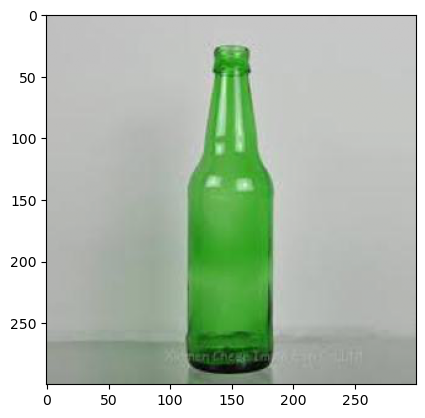

In [520]:
image='2.jpg'
weight=2
img=plt.imread(image)
img=np.multiply(img,1/255)
# img=np.multiply(img,weight)
# # dt=cv.resize(img,(150,150)).reshape(1,150,150,-1)
# # dt=dt[:,:,:,:3]
# # dt_trans = vgg.predict(dt)
# # argmax = np.argmax(model.predict(dt_trans))
# # print(model.predict(dt_trans))
plt.imshow(img)
img

## VGG16 모델 - 6개의 카테고리(종이, 플라스틱, 유리병, 캔, 스티로폼, 페트병)
10000개씩 총 60000개 데이터(이미지 리사이징)

In [5]:
# 각각의 리스트에 이미지파일명 담기
paper_list=glob("./_trash/*종이류*/*/*/*.jpg")
plastic_list=glob("./_trash/*플라스틱류*/*/*/*.jpg")
glass_list=glob("./_trash/*유리병*/*/*/*.jpg")
can_list=glob("./_trash/*캔류*/*/*/*.jpg")
styrofoam_list=glob("./_trash/*스티로폼*/*/*/*.jpg")
pet_list=glob("./_trash/*페트병*/*/*/*.jpg")

# 각 리스트의 개수
print(len(paper_list))
print(len(plastic_list))
print(len(glass_list))
print(len(can_list))
print(len(styrofoam_list))
print(len(pet_list))

16468
39187
42187
36874
40377
40036


In [6]:
data_list=list(chain(
    paper_list,
    plastic_list,
    glass_list,
    can_list,
    styrofoam_list,
    pet_list,
))
print(len(data_list))

215129


In [7]:
# 데이터셋 개수 설정함수
def make_dl(n):
    paper_list_n=paper_list[:n]
    plastic_list_n=plastic_list[:n]
    glass_list_n=glass_list[:n]
    can_list_n=can_list[:n]
    styrofoam_list_n=styrofoam_list[:n]
    pet_list_n=pet_list[:n]
    data_list_n=list(chain(
        paper_list_n, 
        plastic_list_n, 
        glass_list_n, 
        can_list_n,  
        styrofoam_list_n, 
        pet_list_n,
    ))
    return data_list_n

In [8]:
# target리스트 생성함수
def make_target(data_list):
    target=[]
    for idx, val in enumerate(data_list):
        if '종이류' in val:
            target.append(0)
        elif '플라스틱' in val:
            target.append(1)
        elif '유리병' in val:
            target.append(2)
        elif '캔류' in val:
            target.append(3)
        elif '스티로폼' in val:
            target.append(4)
        elif '페트병' in val:
            target.append(5)
    return target

In [9]:
# 레이블
def label_by_index(index):
    labels = ["종이류", "플라스틱류", "유리병", "캔류", "스티로폼", "페트병"]
    return labels[index]

In [10]:
n=10000

# 각 분류당 n개 추출해서 data_list로 병합
data_list=make_dl(n)

# target 생성
target=make_target(data_list)

# 총 데이터셋 개수
print(len(data_list))

60000


In [11]:
# 정수형클래스 레이블을 원-핫 인코딩 벡터로 변환하는 함수
y = np.array(target)
y = to_categorical(y)

In [12]:
X=scaling(data_list)

In [13]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2)

In [14]:
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_)

In [15]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(12000, 150, 150, 3)
(12000, 6)
(36000, 150, 150, 3)
(36000, 6)
(12000, 150, 150, 3)
(12000, 6)


In [16]:
vgg = VGG16(include_top=False, input_shape=(150,150,3))
vgg.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [20]:
X_train_trans = vgg.predict(X_train)
X_validation_trans = vgg.predict(X_validation)

375/375 [==============================] - 273s 728ms/step


In [24]:
model = Sequential(
    [
        Flatten(input_shape=X_train_trans.shape[1:]),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(128,activation='relu'),
        BatchNormalization(),
        Dense(64,activation='relu'),
        BatchNormalization(),
        Dense(32,activation='relu'),
        BatchNormalization(),
        Dense(6
              ,activation='softmax')
    ]
)

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [26]:
history=model.fit(
    X_train_trans,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_validation_trans, y_validation)
)

Epoch 1/20


1125/1125 [==============================] - 24s 20ms/step - loss: 0.6623 - accuracy: 0.7716 - val_loss: 0.4990 - val_accuracy: 0.8265
Epoch 2/20
1125/1125 [==============================] - 22s 19ms/step - loss: 0.4401 - accuracy: 0.8485 - val_loss: 0.4684 - val_accuracy: 0.8342
Epoch 3/20
1125/1125 [==============================] - 21s 19ms/step - loss: 0.3379 - accuracy: 0.8839 - val_loss: 0.4589 - val_accuracy: 0.8423
Epoch 4/20
1125/1125 [==============================] - 21s 19ms/step - loss: 0.2682 - accuracy: 0.9074 - val_loss: 0.4774 - val_accuracy: 0.8472
Epoch 5/20
1125/1125 [==============================] - 22s 19ms/step - loss: 0.2154 - accuracy: 0.9236 - val_loss: 0.4995 - val_accuracy: 0.8477
Epoch 6/20
1125/1125 [==============================] - 22s 20ms/step - loss: 0.1769 - accuracy: 0.9389 - val_loss: 0.5112 - val_accuracy: 0.8451
Epoch 7/20
1125/1125 [==============================] - 22s 19ms/step - loss: 0.1441 - accuracy: 0.9487 - val_loss: 0.5767

In [27]:
X_test_trans=vgg.predict(X_test)

375/375 [==============================] - 269s 716ms/step


In [28]:
model.evaluate(X_test_trans, y_test)

375/375 [==============================] - 1s 2ms/step - loss: 0.7534 - accuracy: 0.8490


[0.7533614635467529, 0.8489999771118164]

In [29]:
print(np.mean(history.history['loss']))
print(np.mean(history.history['accuracy']))
print(np.mean(history.history['val_loss']))
print(np.mean(history.history['val_accuracy']))

0.15638460461050271
0.9459694445133209
0.624231579899788
0.8449791610240937


In [64]:
model.save('trashcan6.keras')

In [65]:
trashcan_model=tf.keras.models.load_model('trashcan6.keras')

In [67]:
with open(file='trashcan6.pickle', mode='wb') as f:
    pickle.dump(history.history,f)

In [69]:
with open(file='trashcan6.pickle', mode='rb') as f:
    history_=pickle.load(f)

In [70]:
history_

{'loss': [0.6622830629348755,
  0.44006043672561646,
  0.3379473388195038,
  0.2681855261325836,
  0.21544960141181946,
  0.1769469529390335,
  0.1441311538219452,
  0.12372034788131714,
  0.10672841966152191,
  0.08857724815607071,
  0.08012993633747101,
  0.07397523522377014,
  0.06011562794446945,
  0.0675443708896637,
  0.056728653609752655,
  0.05422455444931984,
  0.046994730830192566,
  0.040855761617422104,
  0.044895242899656296,
  0.03819788992404938],
 'accuracy': [0.7716110944747925,
  0.8485000133514404,
  0.8838889002799988,
  0.9073610901832581,
  0.9236111044883728,
  0.9388611316680908,
  0.948722243309021,
  0.9566944241523743,
  0.9627777934074402,
  0.9693333506584167,
  0.9731388688087463,
  0.9743055701255798,
  0.979972243309021,
  0.976527750492096,
  0.9807500243186951,
  0.9810277819633484,
  0.9839444160461426,
  0.9863055348396301,
  0.9850833415985107,
  0.9869722127914429],
 'val_loss': [0.49896785616874695,
  0.4683680832386017,
  0.45894086360931396,
  0